# Data science exploration
## Featuring @FremdBot temperature data
* Reminder 1: What is a data scientist?
  * Video: https://www.youtube.com/watch?v=i2jwZcWicSY
  

* Reminder 2: What is Pandas?
  * Pandas is a popular tool that data scientists use to analyze data sets
  * It is a library designed to make it easier to work with large datasets
  * Pandas offers users 2 new data structures:
    * series
    * dataframes
    
    
* Background for today's data exploration:
  * @FremdBot is a Twitter account that tweets out temperature data from Fremd https://twitter.com/fremdbot
  * Made from two Raspberry Pi computers, two temperature probes, and a camera
  * The data collected by @FremdBot is publicly available here:
      * https://thingspeak.com/channels/123549
      * https://thingspeak.com/channels/142171
      * This is an example of "open data" (data that is freely shared with the world)
      * Further reading: https://en.wikipedia.org/wiki/Open_data
   * Related terms: 
     * The Internet of Things (https://en.wikipedia.org/wiki/Internet_of_things)
     * Citizen Science (https://en.wikipedia.org/wiki/Citizen_science)

## The @FremdBot project has generated a great deal of data
* We will use Pandas and some of the tools of datascience to dive into this data
* The data structure we will be using is a dataframe:

In [27]:
# Use pandas to read in the temperature data
import pandas as pd

# Reads in a csv file (comma separated values)
original_data = pd.read_csv("Outdoor_2019.csv")

# Show the last 3 entries in the file:
original_data[-3: ]

,date_time,temp
24940,2017-09-16 17:05:42 UTC,87.6866
24941,2017-09-16 18:05:41 UTC,86.7866
24942,2017-09-16 19:05:42 UTC,87.3500


## Clean the data (remove erroneous temperatures)
* Cleaning data is the process of finding and deleting/fixing erroneous data
  * Further reading: https://en.wikipedia.org/wiki/Data_cleansing
  * In this example, the Raspberry Pi sometimes records an erroneous reading of 185 degrees F 


In [28]:
# Print length
print(len(original_data))

# Trim bad data
temp_data = original_data[original_data.temp < 120]

# Print new length
print(len(temp_data))

24943
24935


## Look at all the temperatures (and sort from low to high)

In [29]:
# Sort the pandas dataframe by temperature
temp_data = temp_data.sort_values("temp")

# Print the first 10 items
temp_data[:10]

,date_time,temp
21283,2016-12-19 10:54:46 UTC,-9.2866
21278,2016-12-19 10:29:44 UTC,-9.2866
21279,2016-12-19 10:34:44 UTC,-9.2866
21292,2016-12-19 11:39:51 UTC,-9.2866
21293,2016-12-19 11:44:51 UTC,-9.2866
21280,2016-12-19 10:39:45 UTC,-9.2866
21275,2016-12-19 10:14:43 UTC,-9.1750
21276,2016-12-19 10:19:43 UTC,-9.1750
21277,2016-12-19 10:24:43 UTC,-9.1750
21281,2016-12-19 10:44:45 UTC,-9.1750


### Now create a single list (pandas series) of only temperatures 

In [30]:
# Create variable, store "temp" values
temps_only = temp_data["temp"]

# Print first ten items
temps_only[:10]

21283   -9.2866
21278   -9.2866
21279   -9.2866
21292   -9.2866
21293   -9.2866
21280   -9.2866
21275   -9.1750
21276   -9.1750
21277   -9.1750
21281   -9.1750
Name: temp, dtype: float64

## Find the average temperature
* The average annual temperature in the Chicagoland area is usually between 49.5F and 52.5F, so this number seems reasonable:

In [31]:
# Import numpy
import numpy as np

# Create list/array of temperatures
temp_array = np.array(temps_only)

# Calculate and print the average
avg = np.average(temp_array)
avg

50.88674208141167

### Find all temperatures greater than 50

In [32]:
# Create variable, store only temps above 50
above_50 = temp_data[temps_only > 50]

# Print the first ten values
above_50

,date_time,temp
17254,2016-11-29 02:25:29 UTC,50.1116
13614,2016-11-11 17:12:36 UTC,50.1116
11880,2016-11-03 14:16:21 UTC,50.1116
4099,2016-09-28 12:29:15 UTC,50.1116
14921,2016-11-16 23:12:14 UTC,50.1116
17257,2016-11-29 02:40:31 UTC,50.1116
17256,2016-11-29 02:35:30 UTC,50.1116
17255,2016-11-29 02:30:30 UTC,50.1116
24405,2017-08-25 10:05:42 UTC,50.1116
4101,2016-09-28 12:39:16 UTC,50.1116


### Find all temperatures greater than 90

In [33]:
above_90 = temp_data[temps_only > 90]

# Print the first ten values
above_90[:10]

,date_time,temp
23839,2017-08-01 18:05:41 UTC,90.0500
37,2016-09-07 20:25:43 UTC,90.1616
41,2016-09-07 20:45:45 UTC,90.2750
45,2016-09-07 21:05:47 UTC,90.2750
38,2016-09-07 20:30:44 UTC,90.3866
39,2016-09-07 20:35:44 UTC,90.3866
40,2016-09-07 20:40:45 UTC,90.3866
23627,2017-07-23 21:05:41 UTC,90.5000
23864,2017-08-02 19:05:42 UTC,90.5000
23865,2017-08-02 20:05:41 UTC,90.6116


## Look at the 10 highest temperatures

In [34]:
# Create variable, store the last 10 temps
high_temps = above_90[-10:]

# Print the first ten values
high_temps

,date_time,temp
23816,2017-07-31 19:05:41 UTC,91.5116
23625,2017-07-23 19:05:41 UTC,91.6250
23862,2017-08-02 17:05:41 UTC,91.9616
23528,2017-07-06 22:05:42 UTC,92.8616
23624,2017-07-23 18:05:42 UTC,93.3116
23523,2017-07-06 17:05:41 UTC,93.3116
23524,2017-07-06 18:05:42 UTC,93.5366
23527,2017-07-06 21:05:42 UTC,94.1000
23525,2017-07-06 19:05:42 UTC,95.0000
23526,2017-07-06 20:05:42 UTC,95.4500


### When did those high temperatures occur?

In [35]:
# Create a variable, store only dates
high_temp_dates = high_temps["date_time"]

# Print results
high_temp_dates

23816    2017-07-31 19:05:41 UTC
23625    2017-07-23 19:05:41 UTC
23862    2017-08-02 17:05:41 UTC
23528    2017-07-06 22:05:42 UTC
23624    2017-07-23 18:05:42 UTC
23523    2017-07-06 17:05:41 UTC
23524    2017-07-06 18:05:42 UTC
23527    2017-07-06 21:05:42 UTC
23525    2017-07-06 19:05:42 UTC
23526    2017-07-06 20:05:42 UTC
Name: date_time, dtype: object

### Reformat the date and time of each entry 

In [36]:
# Import datetime
from datetime import datetime
new_dates = []
for date in temp_data["date_time"]:
    new_dates.append(datetime.strptime(date,'%Y-%m-%d %H:%M:%S UTC'))

print(new_dates[:10])

[datetime.datetime(2016, 12, 19, 10, 54, 46), datetime.datetime(2016, 12, 19, 10, 29, 44), datetime.datetime(2016, 12, 19, 10, 34, 44), datetime.datetime(2016, 12, 19, 11, 39, 51), datetime.datetime(2016, 12, 19, 11, 44, 51), datetime.datetime(2016, 12, 19, 10, 39, 45), datetime.datetime(2016, 12, 19, 10, 14, 43), datetime.datetime(2016, 12, 19, 10, 19, 43), datetime.datetime(2016, 12, 19, 10, 24, 43), datetime.datetime(2016, 12, 19, 10, 44, 45)]


### Now to graph the temperature data...

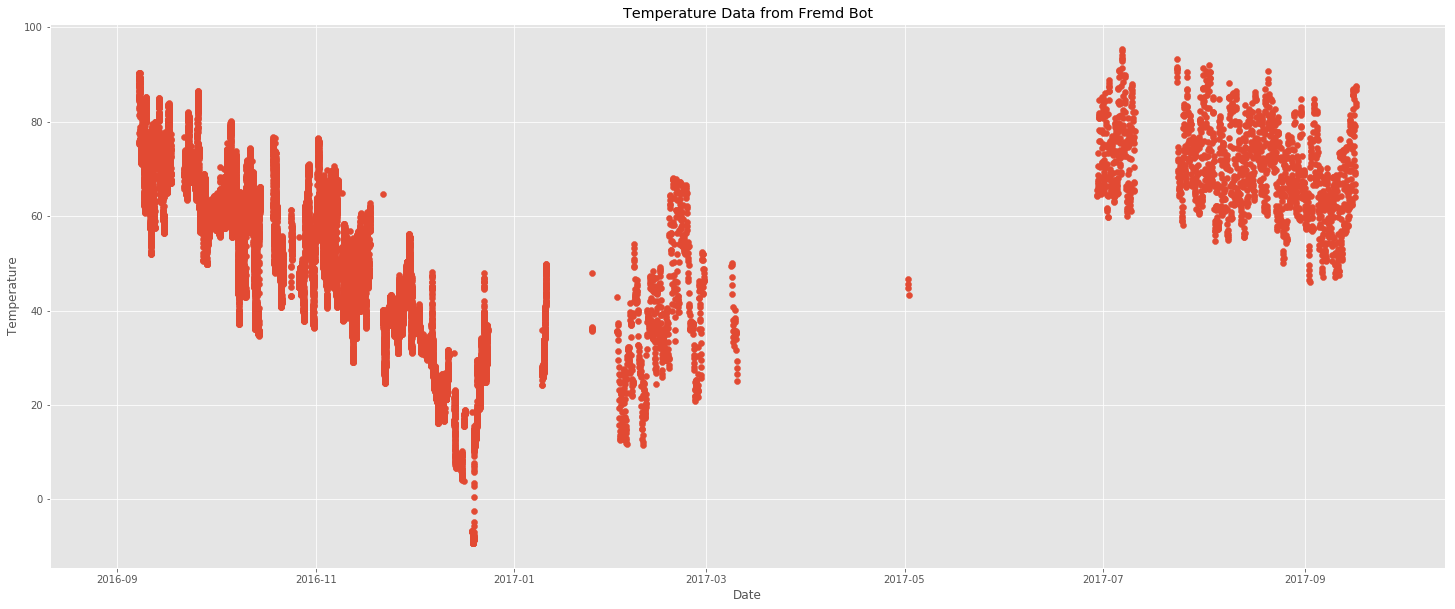

In [37]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(2,(25,10))
plot.style.use("ggplot")  # fivethirtyeight, bmh, grayscale, dark_background, ggplot
plot.title("Temperature Data from Fremd Bot")
plot.xlabel("Date")
plot.ylabel("Temperature")

# plot.scatter(x-axis data, y-axis data)
plot.scatter(new_dates,temp_data["temp"])
plot.show()

### Observations:
* Sometimes a good visualization can show us something that we don't notice in the full data set
  * What do you notice about this scatterplot that wasn't obvious in the original dataset?
  * Is this dataset complete?
  * What might have happened with the data?
    * Instructor note: Two main things happened to the data. Sometimes the .py script that recorded temperatures would crash
    and need to be rebooted. Othertimes the power to our raspberry pi device would be cut off :( Both of these scenarios would cause gaps in the data.
  * Should a dateset be disregarded or deleted because it is imperfect? 

## Try again with indoor temperatures (Room 223):

In [38]:
# Import pandas
import pandas as pd

# Read in the csv file (comma separated values)
indoor_orig = pd.read_csv('Room_223_2019.csv')

# Clean the data (remove entries over 120F)
indoor_clean = indoor_orig[indoor_orig.temp<120]

# Reformat the dates and times
from datetime import datetime
indoor_dates = []

for date in indoor_clean["date_time"]:
    indoor_dates.append(datetime.strptime(date,'%Y-%m-%d %H:%M:%S UTC'))

# Print first 10 results
print(indoor_dates[:10])

[datetime.datetime(2016, 8, 12, 22, 29, 30), datetime.datetime(2016, 8, 12, 22, 34, 31), datetime.datetime(2016, 8, 12, 22, 39, 31), datetime.datetime(2016, 8, 12, 22, 44, 31), datetime.datetime(2016, 8, 12, 22, 49, 32), datetime.datetime(2016, 8, 12, 22, 54, 32), datetime.datetime(2016, 8, 12, 22, 59, 33), datetime.datetime(2016, 8, 12, 23, 4, 33), datetime.datetime(2016, 8, 12, 23, 9, 33), datetime.datetime(2016, 8, 12, 23, 14, 34)]


In [39]:
# Use pandas to read in the temperature data
import pandas as pd

# Reads in a csv file (comma separated values)
new_original_data = pd.read_csv("Room_223_2019.csv")

# Show the last 3 entries in the file:
new_original_data[-3: ]

,date_time,temp
130694,2018-01-28 20:21:54 UTC,63.1616
130695,2018-01-28 20:26:55 UTC,63.1616
130696,2018-01-28 20:31:55 UTC,63.1616


In [40]:
# Print length
print(len(new_original_data))

# Trim bad data
temp_data = new_original_data[new_original_data.temp < 120]

# Print new length
print(len(temp_data))

130697
130687


In [41]:
temp_data = temp_data.sort_values("temp")

# Print the first 10 items
temp_data[:10]

,date_time,temp
123437,2017-12-27 15:46:28 UTC,54.5000
123436,2017-12-27 15:41:28 UTC,54.5000
123434,2017-12-27 15:31:27 UTC,54.6116
123435,2017-12-27 15:36:27 UTC,54.6116
123431,2017-12-27 15:16:25 UTC,54.6116
123432,2017-12-27 15:21:26 UTC,54.7250
123433,2017-12-27 15:26:26 UTC,54.7250
123429,2017-12-27 15:06:24 UTC,54.7250
123430,2017-12-27 15:11:25 UTC,54.7250
123428,2017-12-27 15:01:24 UTC,54.8366


In [42]:
temps_only = temp_data["temp"]

# Print first ten items
temps_only[:10]

123437    54.5000
123436    54.5000
123434    54.6116
123435    54.6116
123431    54.6116
123432    54.7250
123433    54.7250
123429    54.7250
123430    54.7250
123428    54.8366
Name: temp, dtype: float64

In [43]:
below_50 = temp_data[temps_only < 55]

# Print the first ten values
below_50

,date_time,temp
123437,2017-12-27 15:46:28 UTC,54.5000
123436,2017-12-27 15:41:28 UTC,54.5000
123434,2017-12-27 15:31:27 UTC,54.6116
123435,2017-12-27 15:36:27 UTC,54.6116
123431,2017-12-27 15:16:25 UTC,54.6116
123432,2017-12-27 15:21:26 UTC,54.7250
123433,2017-12-27 15:26:26 UTC,54.7250
123429,2017-12-27 15:06:24 UTC,54.7250
123430,2017-12-27 15:11:25 UTC,54.7250
123428,2017-12-27 15:01:24 UTC,54.8366


In [44]:
above_80 = temp_data[temps_only > 80]

# Print the first ten values
above_80

,date_time,temp
89251,2017-08-02 02:07:44 UTC,80.0366
89250,2017-08-02 02:02:43 UTC,80.0366
89249,2017-08-02 01:57:43 UTC,80.0366
83789,2017-07-12 08:48:26 UTC,80.0366
79830,2017-06-27 00:22:45 UTC,80.0366
982,2016-08-16 08:27:51 UTC,80.0366
981,2016-08-16 08:22:50 UTC,80.0366
980,2016-08-16 08:17:50 UTC,80.0366
979,2016-08-16 08:12:50 UTC,80.0366
83260,2017-07-10 12:41:23 UTC,80.0366


In [45]:
# Create variable, store the last 10 temps
low_temps = below_50[:10]

# Print the first ten values
low_temps

,date_time,temp
123437,2017-12-27 15:46:28 UTC,54.5000
123436,2017-12-27 15:41:28 UTC,54.5000
123434,2017-12-27 15:31:27 UTC,54.6116
123435,2017-12-27 15:36:27 UTC,54.6116
123431,2017-12-27 15:16:25 UTC,54.6116
123432,2017-12-27 15:21:26 UTC,54.7250
123433,2017-12-27 15:26:26 UTC,54.7250
123429,2017-12-27 15:06:24 UTC,54.7250
123430,2017-12-27 15:11:25 UTC,54.7250
123428,2017-12-27 15:01:24 UTC,54.8366


In [46]:
high_temps = above_80[-10:]

# Print the first ten values
high_temps

,date_time,temp
75819,2017-06-12 09:06:00 UTC,92.8616
75820,2017-06-12 09:11:00 UTC,92.8616
75821,2017-06-12 09:16:01 UTC,92.8616
75822,2017-06-12 09:21:01 UTC,92.8616
75823,2017-06-12 09:26:02 UTC,92.8616
75824,2017-06-12 09:31:03 UTC,92.8616
75825,2017-06-12 09:36:03 UTC,92.8616
75826,2017-06-12 09:41:04 UTC,92.8616
75830,2017-06-12 10:01:06 UTC,92.8616
75828,2017-06-12 09:51:05 UTC,92.8616


### Plot:

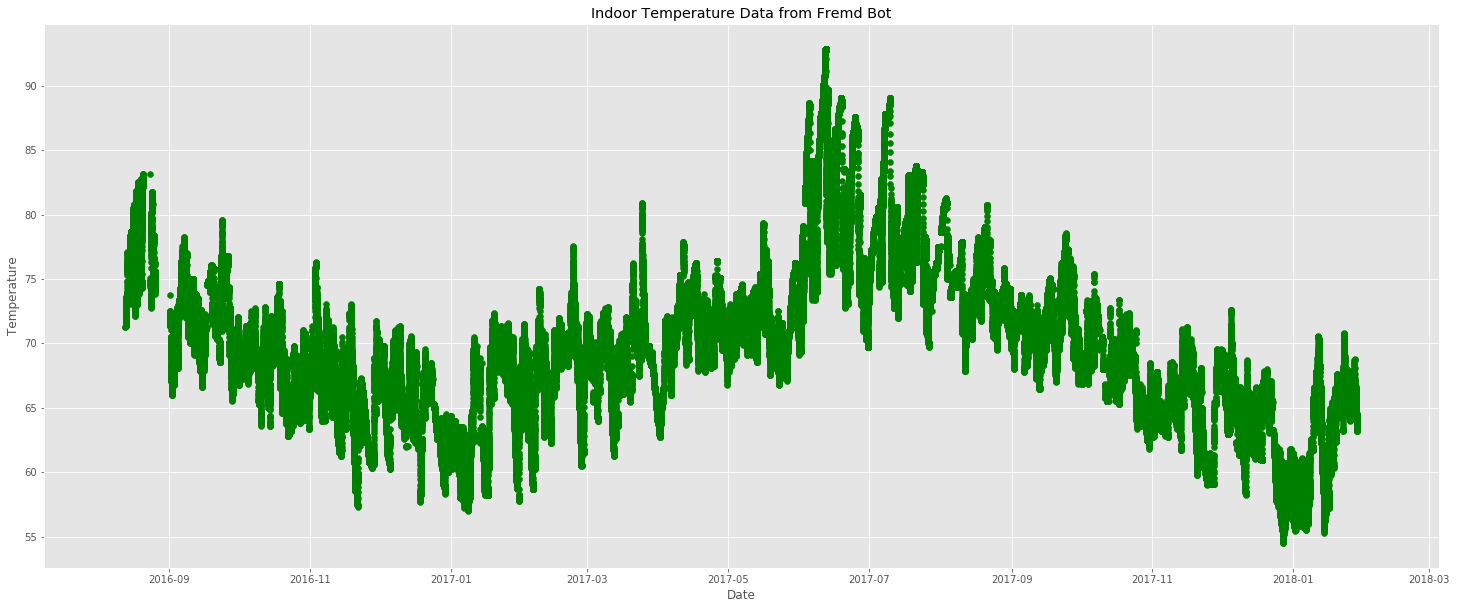

In [47]:
# Import matplotlib
import matplotlib.pyplot as plot
%matplotlib inline

# Graph details
plot.figure(2,(25,10))
plot.style.use("ggplot")  # fivethirtyeight, bmh, grayscale, dark_background, ggplot
plot.title("Indoor Temperature Data from Fremd Bot")
plot.xlabel("Date")
plot.ylabel("Temperature")

#plot.scatter(x, y, s=area, c=colors, alpha=0.5)
plot.scatter(indoor_dates,indoor_clean["temp"],color="green")
plot.show()

# Task 1
* What do you notice about this scatterplot compared to the outdoor temperature scatterplot?

# Answer
* The outside tempreture were more extreme than the inside tempreture, and there is missing data within the outside data due to inactivity

# Task 2
* Show the top 10 hottest temperatures recorded in Room 223
* What was the date and time of the hottest temperature recorded in Room 223?

# Answer
* The highest tempreture in room 223 is 92.8616 degrees

In [48]:
high_temps = above_80[-10:]

# Print the first ten values
high_temps

,date_time,temp
75819,2017-06-12 09:06:00 UTC,92.8616
75820,2017-06-12 09:11:00 UTC,92.8616
75821,2017-06-12 09:16:01 UTC,92.8616
75822,2017-06-12 09:21:01 UTC,92.8616
75823,2017-06-12 09:26:02 UTC,92.8616
75824,2017-06-12 09:31:03 UTC,92.8616
75825,2017-06-12 09:36:03 UTC,92.8616
75826,2017-06-12 09:41:04 UTC,92.8616
75830,2017-06-12 10:01:06 UTC,92.8616
75828,2017-06-12 09:51:05 UTC,92.8616


# Task 3
* Show the 10 coldest temperatures recorded in Room 223
* What was the date and time of the coldest temperature recorded in Room 223?

# Answer
* The lowest tempreture in room 223 is 54.5 degrees

In [49]:
# Create variable, store the last 10 temps
low_temps = below_50[:10]

# Print the first ten values
low_temps

,date_time,temp
123437,2017-12-27 15:46:28 UTC,54.5000
123436,2017-12-27 15:41:28 UTC,54.5000
123434,2017-12-27 15:31:27 UTC,54.6116
123435,2017-12-27 15:36:27 UTC,54.6116
123431,2017-12-27 15:16:25 UTC,54.6116
123432,2017-12-27 15:21:26 UTC,54.7250
123433,2017-12-27 15:26:26 UTC,54.7250
123429,2017-12-27 15:06:24 UTC,54.7250
123430,2017-12-27 15:11:25 UTC,54.7250
123428,2017-12-27 15:01:24 UTC,54.8366


# Task 4
* What was the average temperature in Room 223 based on the provided dataset?

# Answer
* The average tempreture in room 223 is 69.89 degrees

In [50]:
average = np.average(new_original_data["temp"])

average

69.8866966280787

# Challenge
* Use the outdoor temperature data to determine the date and magnitude of the largest 24-hour temperature swing
  * For example, suppose that it was 50 degrees F on 1/5/17 at 5:00pm and -10 degrees F on 1/6/17 at 3:00am
  * If this were the case, then this would be a 24-hour temperature swing of -60 degrees 